In [17]:
import re
import pandas as pd
from datetime import datetime

In [18]:
f = open('WhatsApp Chat with Zingidi zinganias 🐥🐥🫡.txt','r',encoding='utf-8')
data = f.read()
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2})\s?([APMapm]{2})? - (.*?): (.*)'

In [19]:
print(type(data))

<class 'str'>


In [20]:
if 'Media' in data:
    print(data)

2/2/24, 6:48 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
2/2/24, 6:48 PM - Rahul Vit created group "Zingidi zinganias 🐥🐥🫡"
2/2/24, 6:48 PM - Rahul Vit added you
2/2/24, 6:48 PM - Rahul Vit changed this group's icon
2/2/24, 6:49 PM - Krishna Vit: Evaraaa meranthaaaa
2/2/24, 6:49 PM - +91 70138 98977: Why raa 😭?
2/2/24, 6:49 PM - Rahul Vit: This message was deleted
2/2/24, 6:49 PM - Krishna Vit: <Media omitted>
2/2/24, 6:50 PM - Krishna Vit: This message was deleted
2/2/24, 6:50 PM - Rahul Vit: This message was deleted
2/2/24, 6:51 PM - Krishna Vit: Sare eppudu sakaga petu
2/2/24, 6:51 PM - Rahul Vit: This message was deleted
2/2/24, 6:51 PM - Krishna Vit: Time?
2/2/24, 6:51 PM - Rishith Vit: 6.00
2/2/24, 6:51 PM - Krishna Vit: Okay
2/2/24, 6:52 PM - Krishna Vit: I will be there by 6:00:00 <This message was edited>
2/2/24, 6:52 PM - Rahul Vit: POLL:
Cricket paristhithi
OPTION: Ostha (6 vo

In [21]:
def convert_to_24hr_format(date_str, time_str, meridian):
    dt_str = f"{date_str} {time_str} {meridian}"
    dt = datetime.strptime(dt_str, '%m/%d/%y %I:%M %p')
    return dt

dates = []
users = []
messages = []

for match in re.finditer(pattern, data):
    date_str, time_str, meridian, sender, message = match.groups()
    if meridian:
        dt = convert_to_24hr_format(date_str, time_str, meridian)
    else:
        dt = datetime.strptime(f"{date_str} {time_str}", '%m/%d/%y %H:%M')
    dates.append(dt)
    users.append(sender)
    messages.append(message)

In [22]:
df = pd.DataFrame({
    'date': dates,
    'user': users,
    'message': messages,
})

In [23]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [24]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-02-02 18:49:00,Krishna Vit,Evaraaa meranthaaaa,2024,2,2,18,49
1,2024-02-02 18:49:00,+91 70138 98977,Why raa 😭?,2024,2,2,18,49
2,2024-02-02 18:49:00,Rahul Vit,This message was deleted,2024,2,2,18,49
3,2024-02-02 18:49:00,Krishna Vit,<Media omitted>,2024,2,2,18,49
4,2024-02-02 18:50:00,Krishna Vit,This message was deleted,2024,2,2,18,50


In [34]:
df['only_date'] = df['date'].dt.date

In [35]:
df

,date,user,message,year,month,day,hour,minute,only_date
0,2024-02-02 18:49:00,Krishna Vit,Evaraaa meranthaaaa,2024,2,2,18,49,2024-02-02
1,2024-02-02 18:49:00,+91 70138 98977,Why raa 😭?,2024,2,2,18,49,2024-02-02
2,2024-02-02 18:49:00,Rahul Vit,This message was deleted,2024,2,2,18,49,2024-02-02
3,2024-02-02 18:49:00,Krishna Vit,<Media omitted>,2024,2,2,18,49,2024-02-02
4,2024-02-02 18:50:00,Krishna Vit,This message was deleted,2024,2,2,18,50,2024-02-02
...,...,...,...,...,...,...,...,...,...
2070,2024-06-03 21:28:00,Pandu Ajay Krishna❤️❤️,Chudandi oosari,2024,6,3,21,28,2024-06-03
2071,2024-06-03 21:31:00,🪖🪖🪖,Email phone no ochindi ante ga,2024,6,3,21,31,2024-06-03
2072,2024-06-03 21:31:00,🪖🪖🪖,Course gurinchi em raled ga,2024,6,3,21,31,2024-06-03
2073,2024-06-03 21:44:00,Aarya New,Haa,2024,6,3,21,44,2024-06-03


In [25]:
timeline = df.groupby(['year' , 'month']).count()['message'].reset_index()

In [26]:
timeline

,year,month,message
0,2024,2,482
1,2024,3,539
2,2024,4,299
3,2024,5,677
4,2024,6,78


In [27]:

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace 'month' column with 'month_num'
timeline.rename(columns={'month': 'month_num'}, inplace=True)

# Add new 'month' column with month names
timeline['month'] = timeline['month_num'].map(month_names)

In [28]:
time = []

for i in range(timeline.shape[0]):
    time.append(str(timeline['month'][i]) + "-" + str(timeline['year'][i]))

In [29]:
timeline

,year,month_num,message,month
0,2024,2,482,February
1,2024,3,539,March
2,2024,4,299,April
3,2024,5,677,May
4,2024,6,78,June


In [30]:
timeline['time'] = time

In [31]:
timeline

,year,month_num,message,month,time
0,2024,2,482,February,February-2024
1,2024,3,539,March,March-2024
2,2024,4,299,April,April-2024
3,2024,5,677,May,May-2024
4,2024,6,78,June,June-2024


In [32]:
import matplotlib.pyplot as plt


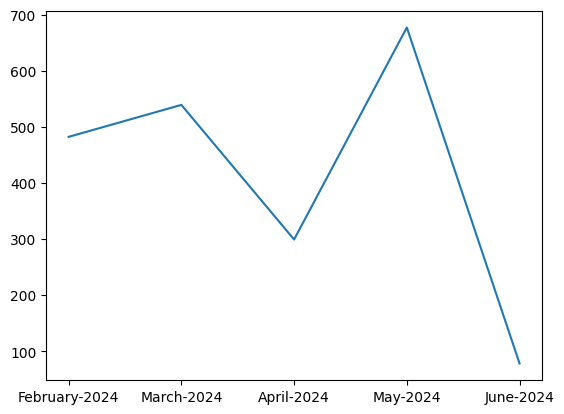

In [33]:
plt.plot(timeline['time'],timeline['message'])

In [36]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

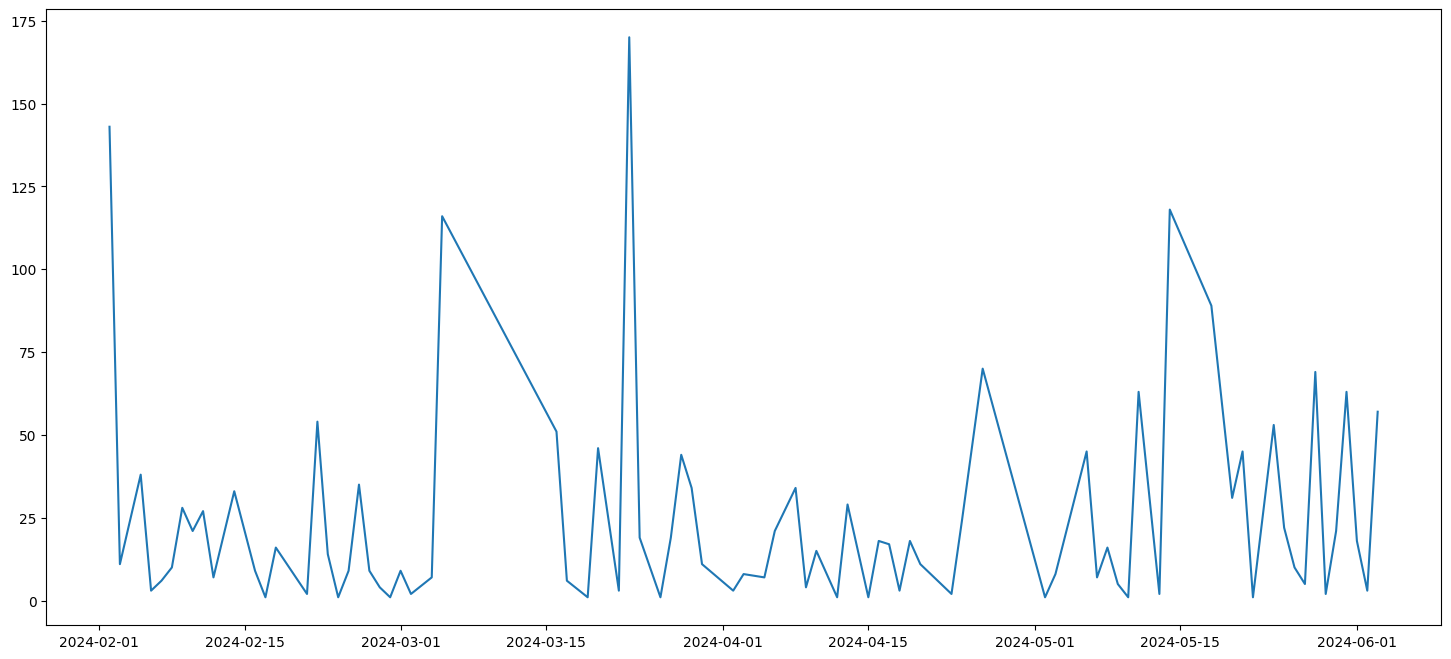

In [39]:
plt.figure(figsize = (18,8))

plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [40]:
df['day_name'] = df['date'].dt.day_name()

In [41]:
df['day_name'].value_counts()

day_name
Saturday     521
Friday       461
Tuesday      396
Monday       267
Wednesday    193
Thursday     147
Sunday        90
Name: count, dtype: int64